## Machine Learning

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor


In [2]:
data = pd.read_csv('/home/christine/Downloads/Ml Project/delaney_solubility_with_descriptors.csv')

In [3]:
data.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


## Data Preparation


In [6]:

#y variable
y = data['logS']
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [8]:
#x variable
X = data.drop('logS',axis=1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


In [10]:
#splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
y_train

643    -4.300
722    -8.400
570    -3.754
66      0.000
1002   -1.340
        ...  
1044   -3.324
1095   -1.620
1130   -5.680
860    -4.770
1126   -6.010
Name: logS, Length: 915, dtype: float64

## Modelling

## Linear Regression

In [16]:
#let's train the model
#regressor
lr = LinearRegression()
lr.fit(X_train,y_train)



LinearRegression()

In [46]:
#use the model to make a prediction
y_lrtrain_pred = lr.predict(X_train)
y_lrtest_pred = lr.predict(X_test)

y_lrtrain_pred

array([ -4.47026156,  -5.88839323,  -4.22029229,  -0.79352323,
        -1.73062942,  -1.26187649,  -1.43969557,  -2.36087206,
        -2.77481055,  -2.23755209,  -4.15424648,  -8.49226359,
        -4.26355722,  -1.5773174 ,  -2.61749814,  -0.72935686,
        -3.18513222,  -3.71048234,  -1.57995763,  -5.11539503,
        -1.90340063,  -4.18841892,  -4.85523085,  -2.13317387,
        -3.34701685,  -3.45842365,  -3.73715663,  -3.61882675,
        -3.02530867,  -2.82178231,  -1.54861269,  -2.73630968,
        -1.79353838,  -6.49056433,  -2.19068424,  -4.10802907,
        -2.7303035 ,  -2.28598248,  -2.60739155,  -3.64519507,
        -2.65218678,  -4.35285798,   1.91721982,  -3.70871993,
        -3.50138017,  -2.71898539,  -4.77720737,  -3.38184768,
        -1.71815824,  -2.79713356,  -5.26774517,  -2.96884167,
        -2.27709013,  -2.76017539,  -2.12748391,  -2.3140745 ,
        -7.74681081,  -3.21253144,  -1.76376134,  -4.17337487,
        -2.93249251,  -0.51506669,  -3.06834756,  -0.72

In [19]:
y_test_pred

array([-1.53917269, -6.08287944, -5.28375883, -3.27746087, -1.70320929,
       -5.63167711, -1.43239582, -2.74544339, -3.43274443, -3.79048137,
       -1.26884289, -1.54861269, -3.72258406, -3.25962057, -3.76344744,
       -2.13317387, -2.00365994, -4.80828381, -1.43582956, -2.81358533,
       -2.37870232, -1.45080608, -3.71048234, -3.06158669, -1.12854214,
       -1.11007232, -2.45566761, -5.0338893 , -3.29087978, -4.21832264,
       -2.45834377, -3.09200621, -3.89726792, -1.85208473, -2.17761301,
       -6.01542152, -1.06493784, -2.35071265, -1.72034021, -1.45695216,
       -1.85208473, -6.66998091, -1.23899725, -1.46015868, -1.65115215,
       -3.79048137, -4.73551134, -1.09859266, -0.69404611, -1.91048017,
       -3.16121056, -2.34753749, -2.01980335, -2.51436431, -7.04012802,
       -5.27488937, -4.18979204, -2.9647599 , -1.7364388 , -1.64388527,
       -4.60884756, -4.84900677, -0.18955927, -1.73839902, -1.63779456,
       -2.01616982, -1.46391856, -7.64117637, -1.34518182, -2.28

## Evaluate Model Perfomance

In [47]:
lr_train_mse = mean_squared_error(y_train,y_lrtrain_pred)
lr_train_r2 = r2_score(y_train,y_lrtrain_pred)

lr_test_mse = mean_squared_error(y_test,y_lrtest_pred)
lr_test_r2 = r2_score(y_test,y_lrtest_pred)

In [28]:
#print out the results
print('train mse', lr_test_mse)
print('train r2', lr_train_r2)
print('test mse', lr_test_mse)
print('test r2', lr_test_r2)

train mse 0.9990844407075306
train r2 0.7695127746587307
test mse 0.9990844407075306
test r2 0.7705650058569232


In [31]:
lr_results = pd.DataFrame(['LinearRegression',lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2]).transpose()
lr_results.columns = ['Method','Training mse','Training R2','Testing mse','Testing R2']
lr_results

,Method,Training mse,Training R2,Testing mse,Testing R2
0,LinearRegression,1.01399,0.769513,0.999084,0.770565


## Random Forest

In [33]:
#training the model
#initiate the regressor
rf = RandomForestRegressor(max_depth=2,random_state=42)
#fit the model
rf.fit(X_train,y_train)


RandomForestRegressor(max_depth=2, random_state=42)

In [34]:
#make the prediction
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

## Model Perfomance Evaluation


In [35]:
rf_train_mse = mean_squared_error(y_train,y_train_pred)
rf_train_r2 = r2_score(y_train,y_train_pred)

rf_test_mse = mean_squared_error(y_test,y_test_pred)
rf_test_r2 = r2_score(y_test,y_test_pred)

In [37]:
#print out the results
print('train mse', rf_test_mse)
print('train r2', rf_train_r2)
print('test mse', rf_test_mse)
print('test r2', rf_test_r2)

train mse 1.046995320525706
train r2 0.7612702336785788
test mse 1.046995320525706
test r2 0.7595624999799543


In [38]:
#make a DataFrame
rf_results = pd.DataFrame(['Random Forest',rf_train_mse,rf_train_r2,rf_test_mse,rf_test_r2]).transpose()
rf_results.columns = ['Method','Training mse','Training R2','Testing mse','Testing R2']
rf_results


,Method,Training mse,Training R2,Testing mse,Testing R2
0,Random Forest,1.05025,0.76127,1.047,0.759562


## Model Comparison

In [41]:
df_models = pd.concat([lr_results,rf_results],axis=0)
df_models

,Method,Training mse,Training R2,Testing mse,Testing R2
0,LinearRegression,1.01399,0.769513,0.999084,0.770565
0,Random Forest,1.05025,0.76127,1.047,0.759562


In [44]:
#correct indexing
df_models.reset_index(drop=True)


,Method,Training mse,Training R2,Testing mse,Testing R2
0,LinearRegression,1.01399,0.769513,0.999084,0.770565
1,Random Forest,1.05025,0.76127,1.047,0.759562


## Data Visualization of the prediction results

[]

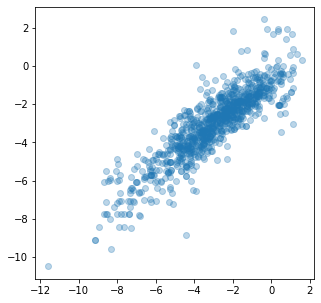

In [59]:
plt.figure(figsize=(5,5))
plt.scatter(y_train,y_lrtrain_pred,alpha=0.3)
#plt.ylabel('Predict Logs')
#plt.xlabel('Experimental Logs')
#plt.title('Prediction Results')
plt.plot()